In [32]:
import numpy as np #Importing numpy 
from pymoo.algorithms.moo.nsga2 import NSGA2 #Importing NSGA 2 
from pymoo.core.problem import ElementwiseProblem #Importing problem
from pymoo.optimize import minimize #Importing objective
from pymoo.visualization.scatter import Scatter #Importing plots

from pymoo.core.problem import Problem #Importing problem
from pymoo.problems.functional import FunctionalProblem #Importing problem


In [33]:
class TurningExtraVariablesAndCoeffients: #declaring extra variables in the process

    def __init__(self, l=50., n=500., tt='DRY', kc=300.):
        self.length = l
        self.n = n
        self.ttype = tt
        self.kc = kc #kc is a constant 

In [34]:
class MyProblem(ElementwiseProblem):

    def __init__(self, vcmin=100., vcmax=500., fnmin=0.1, fnmax=0.20, apmin=0.5, apmax=1.2):
        super().__init__(n_var=3,
                         n_obj=3,
                         n_ieq_constr=0,
                         xl=np.array([vcmin, fnmin, apmin]),
                         xu=np.array([vcmax, fnmax, apmax]))
        self.i = 1
    def f1(self, l, fn, n): # t
        return  l / (fn * n)
    
    def f20(self, vc, fn): # VB 'DRY'
        return (vc ** 1.52 * fn ** 0.820) / (3.25 * 10000)

    def f21(self, vc, fn): # VB 'MQL'
        return (vc ** 1.42 * fn ** 0.911) / (2.33 * 10000)

    def f3(self, vc, fn, ap, kc): # P
        return (vc * ap * fn * kc) / (60 * 10000)

    def _evaluate(self, x, out, *args, **kwargs):
        vc = x[0]
        fn = x[1]
        ap = x[2]

        tevc = TurningExtraVariablesAndCoeffients()

        f1 = self.f1(tevc.length, fn, tevc.n)
        if tevc.ttype in 'DRY': #'DRY': # or 'MQL'
            f2 = self.f20(vc, fn)
        else:
            f2 = self.f21(vc, fn)
        f3 = self.f3(vc, ap, fn, tevc.kc)
        self.i += 1
        out["F"] = [f1, f2, f3]
        out["G"] = [] 


In [35]:
problem = MyProblem()
random.seed()
algorithm = NSGA2(pop_size=20)

res = minimize(problem, algorithm, ("n_gen", 50), verbose=False, seed=None);

Idx  f1=t        f2=VB       f3=P       MRR  Vc   Fn  Ap
1   [0.99977194 0.0051078  0.00271364] 5.427 100.0 0.1 0.54
2   [0.99439205 0.0051313  0.00251539] 5.031 100.0 0.1 0.5
3   [0.5008164  0.00900337 0.01197741] 23.955 100.0 0.2 1.2
4   [0.50000003 0.00901716 0.00514345] 10.287 100.0 0.2 0.51
5   [0.73551267 0.00656922 0.00803828] 16.077 100.0 0.14 1.18
6   [0.77822164 0.00627224 0.00682973] 13.659 100.0 0.13 1.06
7   [0.89542158 0.00559082 0.00279455] 5.589 100.0 0.11 0.5
8   [0.82400862 0.00598645 0.00705089] 14.102 100.0 0.12 1.16
9   [0.51483103 0.00880161 0.01165111] 23.302 100.0 0.19 1.2
10   [0.54876062 0.00835274 0.00477013] 9.54 100.0 0.18 0.52
11   [0.5997317  0.00776602 0.00983009] 19.66 100.0 0.17 1.18
12   [0.71116515 0.00675322 0.00354718] 7.094 100.0 0.14 0.5
13   [0.91946147 0.00547072 0.00629317] 12.586 100.0 0.11 1.16
14   [0.63487197 0.00741167 0.00906958] 18.139 100.0 0.16 1.15
15   [0.70154518 0.00683577 0.00844867] 16.897 100.0 0.14 1.18
16   [0.63960754 0.0073

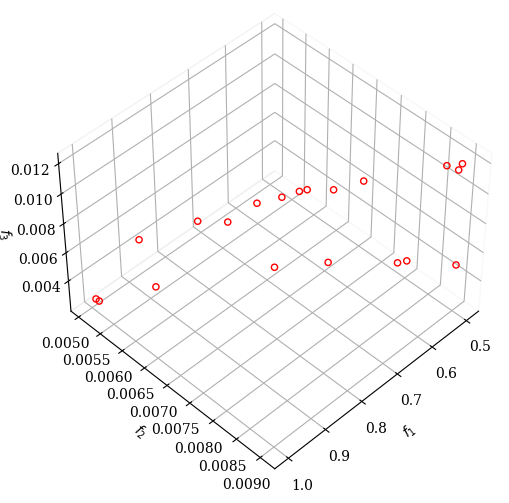

In [36]:
print('Idx', ' f1=t       ', 'f2=VB      ', 'f3=P      ', 'MRR ', 'Vc  ', 'Fn ', 'Ap')
for i in range(0, len(res.F)):
    s = res.X[i][0]
    fn = res.X[i][1]
    ap = res.X[i][2]
    print(i+1, ' ', res.F[i], round(s*fn*ap, 3), round(res.X[i][0], 0), round(res.X[i][1], 2), round(res.X[i][2], 2))

plot = Scatter()
plot.add(res.F, edgecolor="red", facecolor="none")
plot.show()
